<a href="https://colab.research.google.com/github/vanand102/DataScienceGuidedCapstone/blob/master/Capstone3_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-Processing**

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries

In [3]:
#Import folder
import sys
sys.path.append('/content/drive/MyDrive/Springboard/Capstone 3')

In [82]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import stats
import os
import numpy as np

# modeling

from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#

from library.sb_utils import save_file

In [5]:
# the supplied CSV data file is the raw_data directory
diamond_data = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone 3/diamond_data.csv')

In [6]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53920 entries, 0 to 53919
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53920 non-null  int64  
 1   carat    53920 non-null  float64
 2   cut      53920 non-null  object 
 3   color    53920 non-null  object 
 4   clarity  53920 non-null  object 
 5   depth    53920 non-null  float64
 6   table    53920 non-null  float64
 7   price    53920 non-null  int64  
 8   x        53920 non-null  float64
 9   y        53920 non-null  float64
 10  z        53920 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Drop ID column as it is not a key feature for modeling.

In [7]:
diamond_data.drop(columns=['id'])

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53915,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53916,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53917,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53918,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Use the getdummies function on the categorical features in the data in order to create dummy variables.

In [8]:
categorical_features = ['cut',
                        'color',
                        'clarity']
diamond_data = pd.get_dummies(diamond_data, columns = categorical_features)
print('The data have ', diamond_data.shape[0], ' rows and ', diamond_data.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(diamond_data.columns)))

The data have  53920  rows and  28  columns

column names: 

id
carat
depth
table
price
x
y
z
cut_Fair
cut_Good
cut_Ideal
cut_Premium
cut_Very Good
color_D
color_E
color_F
color_G
color_H
color_I
color_J
clarity_I1
clarity_IF
clarity_SI1
clarity_SI2
clarity_VS1
clarity_VS2
clarity_VVS1
clarity_VVS2


Use the standard scalar function on the numerical features in the data in order to scale the data.

In [9]:
numerical_features = ['carat',
                      'depth',
                      'table',
                      'price',
                      'x',
                      'y',
                      'z']
# Making a Scaler object
scaler = sklearn.preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_df = scaler.fit_transform(diamond_data[numerical_features])
scaled_df = pd.DataFrame(scaled_df, columns=numerical_features)

In [10]:
scaled_data = diamond_data
scaled_data['carat'] = scaled_df['carat']
scaled_data['depth'] = scaled_df['depth']
scaled_data['table'] = scaled_df['table']
scaled_data['price'] = scaled_df['price']
scaled_data['x'] = scaled_df['x']
scaled_data['y'] = scaled_df['y']
scaled_data['z'] = scaled_df['z']

In [11]:
scaled_data.head()

,id,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583,0,1,...,0,1,0,0,0,1,0,0,0,0


Create the X and y variables and then split them into test and train data sets.

In [12]:
X = scaled_data.drop(columns = ['price'])
y = scaled_data['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 2)
print('Training split has ', X_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_train))+ ')')
print('Test split has ', X_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_test)) + ')')

Training split has  43136  rows
 and the corresponding labels have an equal number of values. (43136)
Test split has  10784  rows
 and the corresponding labels have an equal number of values. (10784)


Save scaled_data

In [14]:
datapath = '/content/drive/MyDrive/Springboard/Capstone 3'
save_file(scaled_data, 'diamond_data_2.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


# **Data Modeling**

Model 1: Linear Regression

In [15]:
rModel = linear_model.LinearRegression()

In [16]:
rModel.fit(X_train, y_train)

LinearRegression()

Checked the R-squared score to determine the performance of this model.

In [17]:
print(rModel.score(X_train, y_train))

0.9199215464821431


In [18]:
y_pred = rModel.predict(X_test)

In [23]:
print(rModel.score(X_test, y_test))

0.9224103201969325


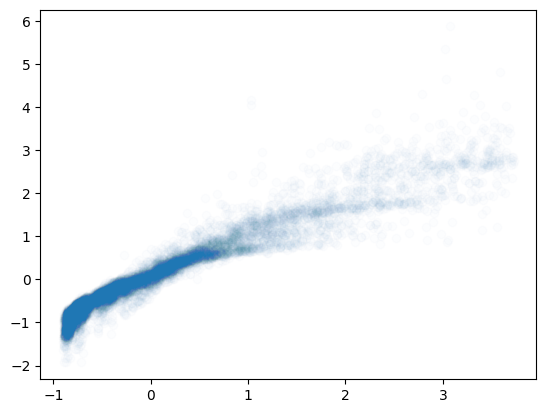

In [20]:
plt.scatter(y_test,y_pred, alpha = 0.01)

In [21]:
y_diff = y_test - y_pred

Histogram showing the distribution of variances between y_test and y_pred.

<Axes: xlabel='price', ylabel='Count'>

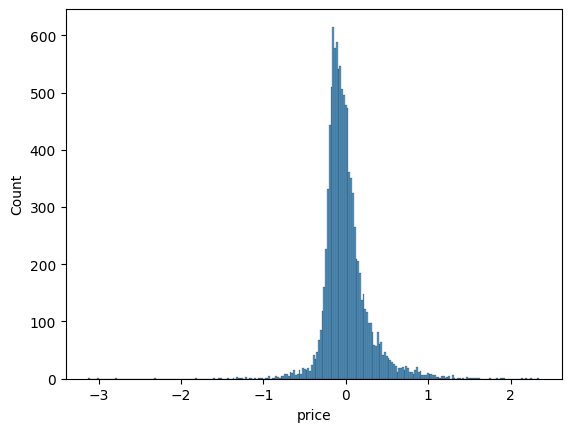

In [22]:
sns.histplot(data=y_diff)

Model 2: Random Forest Regressor

Grid Search with complexity parameters

In [34]:
search_space_randomforest = {"max_depth": [2,3,4,5,6,7], "n_estimators": [5,10,15,25]}

In [35]:
Random_Forest = RandomForestRegressor()

In [36]:
cv_sets = ShuffleSplit(3, test_size = 0.20, random_state = 0)

In [37]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'r2', cv = cv_sets)

In [38]:
RF_Grid = RF_Grid.fit(X_train,y_train)

Chart for max_depth

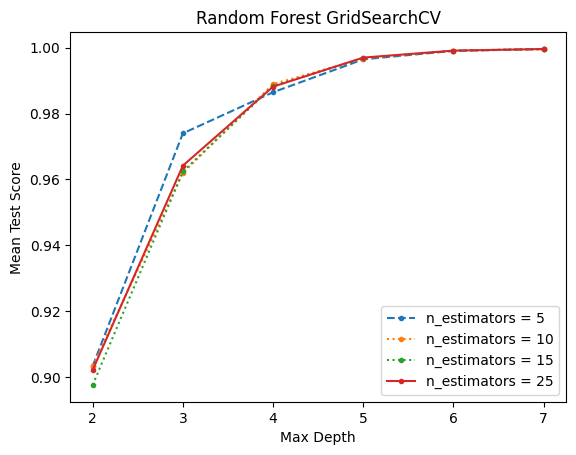

In [41]:
#Turn results into dataframe
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

# create data
Max_depth_x = [2,3,4,5,6,7]
Mean_score_5 = RF_Griddf[RF_Griddf["param_n_estimators"] == 5]['mean_test_score']
Mean_score_10 = RF_Griddf[RF_Griddf["param_n_estimators"] == 10]['mean_test_score']
Mean_score_15 = RF_Griddf[RF_Griddf["param_n_estimators"] == 15]['mean_test_score']
Mean_score_25 = RF_Griddf[RF_Griddf["param_n_estimators"] == 25]['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score_5, label = "n_estimators = 5", ls = '--', marker='.')
plt.plot(Max_depth_x,Mean_score_10, label = "n_estimators = 10", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_15, label = "n_estimators = 15", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_25, label = "n_estimators = 25", ls = '-', marker='.')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Random Forest GridSearchCV')
plt.legend()

plt.show()

A max depth of 4 and n_estimator of 10 appear to be the elbow point for the Mean Test Score.

GridSearch using best complexity parameters for the best criterion.

In [42]:
search_space_randomforest = {"criterion": ['squared_error','friedman_mse','absolute_error']}

In [43]:
Random_Forest = RandomForestRegressor(max_depth= 4, n_estimators= 10)

In [44]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'r2', cv = cv_sets)

In [45]:
RF_Grid = RF_Grid.fit(X_train,y_train)

In [46]:
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

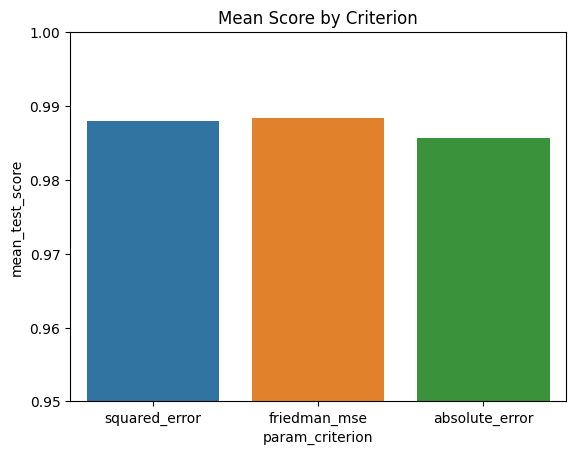

In [47]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = RF_Griddf)
chart.set_ylim(0.95, 1)
chart.set(title='Mean Score by Criterion')

The optimal paramaters for this model are max_depth = 4, n_estimators = 10, and criterion = squared_error. Created the final model based on these parameters.

In [54]:
Random_Forest = RandomForestRegressor(max_depth= 4, n_estimators= 10, criterion='squared_error')

In [55]:
Random_Forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=10)

In [56]:
print(Random_Forest.score(X_train, y_train))

0.986598454333982


In [57]:
y_pred = Random_Forest.predict(X_test)

In [60]:
print(Random_Forest.score(X_test, y_test))

0.9869183770076458


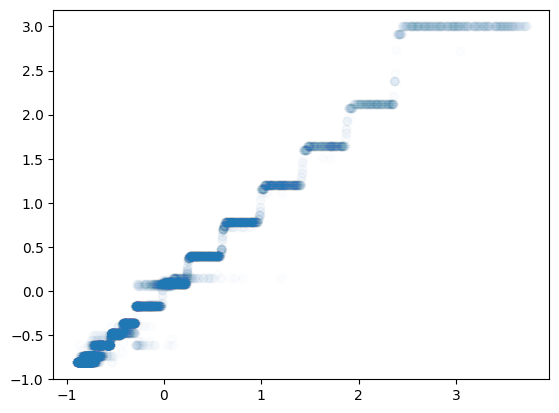

In [61]:
plt.scatter(y_test,y_pred, alpha = 0.01)

In [62]:
y_diff = y_test - y_pred

<Axes: xlabel='price', ylabel='Count'>

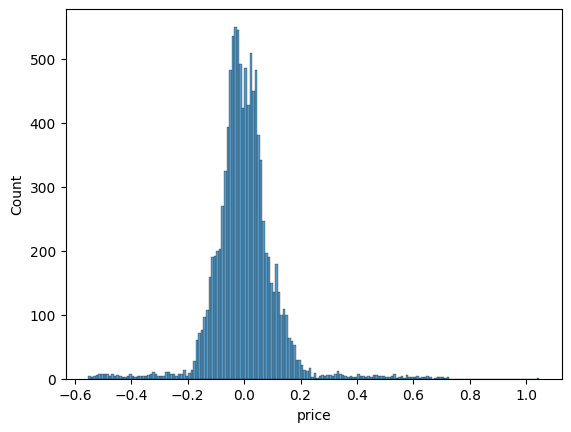

In [63]:
sns.histplot(data=y_diff)

Model 3: Decision Tree

Grid Search with complexity parameters

In [64]:
search_space_decisiontree = {"max_depth": [2,3,4,5,6,7]}

In [65]:
Decision_Tree = DecisionTreeRegressor()

In [66]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'r2', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_train, y_train)

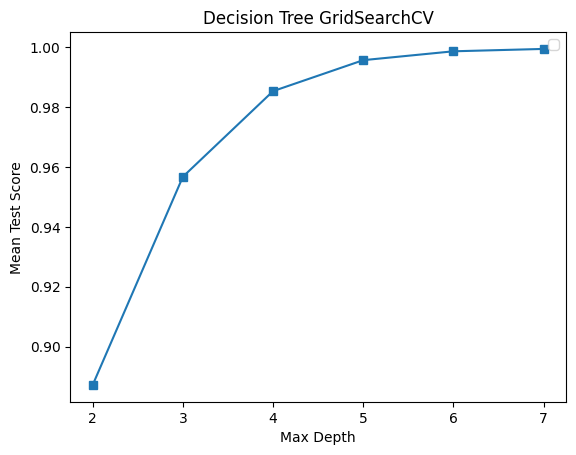

In [67]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

# create data
Max_depth_x = [2,3,4,5,6,7]
Mean_score = DT_Griddf['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score, ls = '-', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree GridSearchCV')
plt.legend()

plt.show()

A max depth of 4 is the elbow point for the Mean Test Score.

GridSearch using best complexity parameters for the best criterion.

In [68]:
search_space_decisiontree = {"criterion": ['squared_error', 'friedman_mse', 'absolute_error']}

In [69]:
Decision_Tree = DecisionTreeRegressor(max_depth = 4)

In [70]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'r2', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_train, y_train)

In [71]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

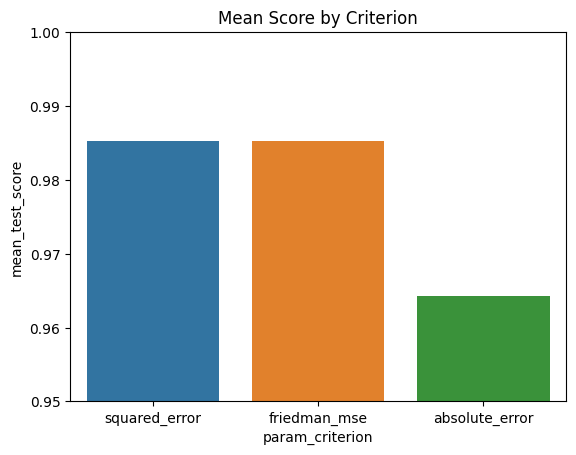

In [72]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = DT_Griddf)
chart.set_ylim(0.95, 1)
chart.set(title='Mean Score by Criterion')

The optimal paramaters for this model are max_depth = 4 and criterion = squared_error. Created the final model based on these parameters.

In [73]:
Decision_Tree = DecisionTreeRegressor(max_depth = 4, criterion='squared_error')

In [74]:
Decision_Tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [75]:
print(Decision_Tree.score(X_train, y_train))

0.9851941285560533


In [76]:
y_pred = Decision_Tree.predict(X_test)

In [77]:
print(Decision_Tree.score(X_test, y_test))

0.9855293192433249


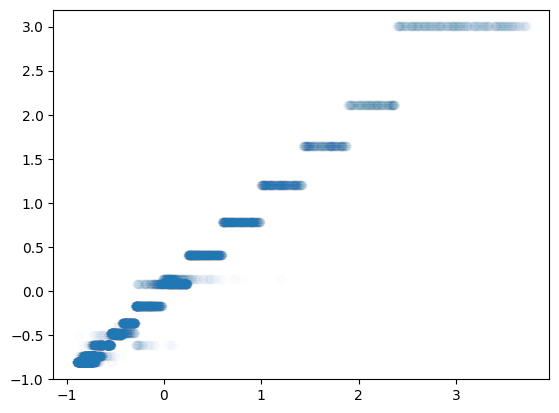

In [78]:
plt.scatter(y_test,y_pred, alpha = 0.01)

In [79]:
y_diff = y_test - y_pred

<Axes: xlabel='price', ylabel='Count'>

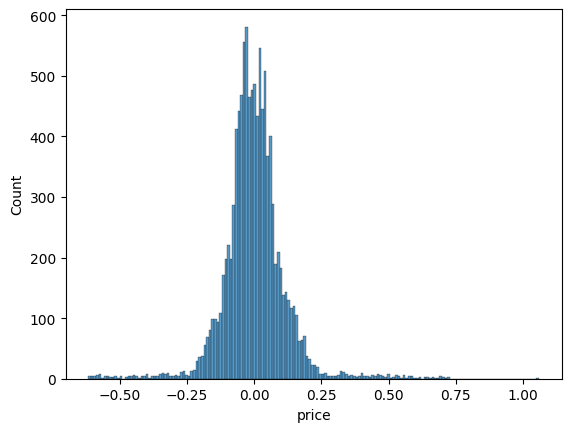

In [80]:
sns.histplot(data=y_diff)

Model 4: Nearest Neighbors Regression

Grid Search with complexity parameters

In [81]:
search_space_nearestneighbors = {"n_neighbors": [2,5,10,15], "p": [1,2]}

In [83]:
Nearest_Neighbors = KNeighborsRegressor()

In [84]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_nearestneighbors, scoring = 'r2', cv = cv_sets)

In [85]:
NN_Grid = NN_Grid.fit(X_train,y_train)

Chart for n_neighbors

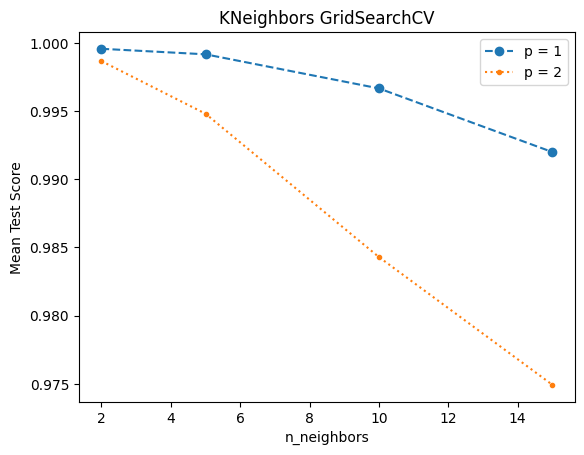

In [86]:
#Turn results into dataframe
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

# create data
n_neighbors_x = [2,5,10,15]
P_1 = NN_Griddf[NN_Griddf["param_p"] == 1]['mean_test_score']
P_2 = NN_Griddf[NN_Griddf["param_p"] == 2]['mean_test_score']


#plot graph
plt.plot(n_neighbors_x,P_1, label = "p = 1", ls = '--', marker='o')
plt.plot(n_neighbors_x,P_2, label = "p = 2", ls = ':', marker='.')


plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNeighbors GridSearchCV')
plt.legend()

plt.show()

I chose a p value of 1 and n_neighbors of 10 for this model to avoid overfitting.

GridSearch using best complexity parameters for the best criterion.

In [87]:
search_space_NN = {"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [88]:
Nearest_Neighbors = KNeighborsRegressor(p = 1, n_neighbors=10)

In [89]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_NN, scoring = 'r2', cv = cv_sets)

In [90]:
NN_Grid = NN_Grid.fit(X_train,y_train)

In [91]:
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

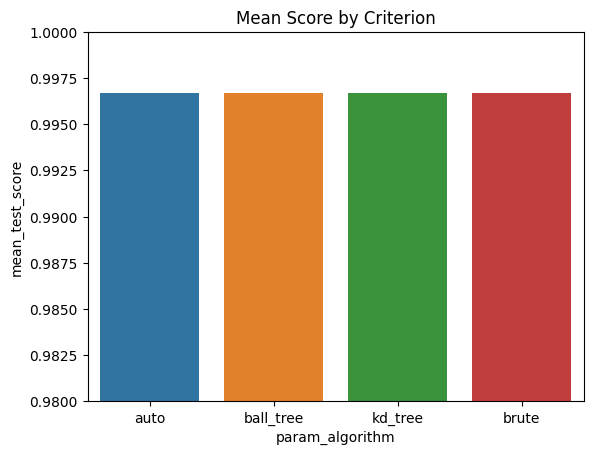

In [93]:
chart = sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = NN_Griddf)
chart.set_ylim(0.98, 1)
chart.set(title='Mean Score by Criterion')

As all algorithms performed the same, I'll let the model use the default algorithm and specify the optimal hyper parameters, p value of 1 and n_neighbors of 10.

In [94]:
Nearest_Neighbors = KNeighborsRegressor(p = 1, n_neighbors=10)

In [95]:
Nearest_Neighbors.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10, p=1)

In [96]:
print(Nearest_Neighbors.score(X_train, y_train))

0.9989870753753155


In [97]:
y_pred = Nearest_Neighbors.predict(X_test)

In [98]:
print(Nearest_Neighbors.score(X_test, y_test))

0.9978899692453133


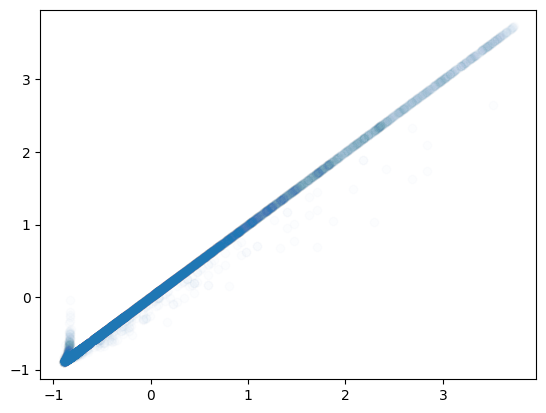

In [99]:
plt.scatter(y_test,y_pred, alpha = 0.01)

In [100]:
y_diff = y_test - y_pred

<Axes: xlabel='price', ylabel='Count'>

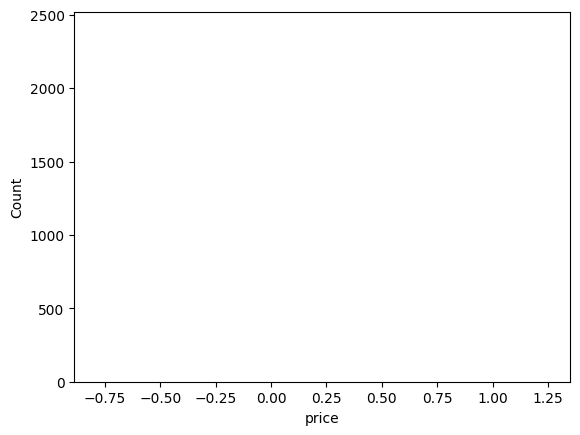

In [104]:
sns.histplot(data=y_diff)